##  Логистическая регрессия

   В машинном обучении задачей классификации называется ситуация, когда в качестве целевой переменнной $y$ (переменной которую мы хотим предсказать) выступает категориальная переменная. Это означает, что данная переменная задает разбиение нашего датасета на классы, которых может быть как 2, так и больше. 
   
   Нашей задачей в таком случае становится построение алгоритма $a(x)$, который бы смог отделить классы друг от друга в пространстве признаков, или что тоже самое провести разделяющую поверхность между классами.

Начнем с задачи бинарной классификации.

В линейном бинарном классификаторе разделяющая поверхность - гиперплоскость, а алгоритм $a(x)$ задается равенством

$$a(x) = sign(w_0 + \sum_{j = 1}^{d}w_jx^j)$$

где 
$w_0$ - свободный коэффициент
$w_1,...,w_d$ - веса
$x^j$ - признаки

Прежде чем обучать алгоритм, нам необходимо выбрать функционал качества $Q(a, X)$ для нашей задачи.

$$Q(a, X) = \frac{1}{n}\sum_{i=1}^{n}L(y_i, a(x_i))$$

где $L(y, a(x))$ - функция потерь

Как известно, выбрав функционалом качества долю неправильных ответов, мы не сможем решать задачу минимизации с помощью градиентных методов. Поэтому мы аппроксимируем функционал качества сверху $$Q(a, X)\le \frac{1}{n} \sum_{i=1}^{n}\tilde L(y_i, a(x_i))$$

где $\tilde L(y_i, a(x_i))$ гладкая  и диффиренцируемая функция

Одним из решений является логистическая функция потерь, которая имеет следующий вид:

$$
\tilde L(y_i, a(x_i)) = - (y_i \log(p_i) + (1 - y_i) \log(1 - p_i))
$$

где $p_i$ - это вероятность принадлежности объекта $x_i$ к классу 1, предсказанная нашим алгоритмом. 

Чтобы получить $p_i$ введем алгоритм линейной регрессии $b(x)$
$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Чтобы получить алгоритм, который возвращает значения из интервала $(0, 1)$, можно обернуть выход алгоритма $b(x)$ в сигмоиду. Сигмоида это любая S - образная функция принимающая значения из $(0, 1)$. Частный случай: логистическая функция, которая имеет следующий вид:

$$
\sigma (z) = \frac{1}{1 + e^{-z}}
$$




В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как:

$$
p_i = P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

## 1. Обработка данных

#### 1.1 Загрузка данных

Загрузим датасет о пассажирах титаника.

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('titanic.csv')

в файле train.csv каждая строчка наборов данных содержит следующие поля:

- `Survived` - целевая переменная, выжил пассажир или нет

- `Pclass` — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- `Name` — имя;

- `Sex` — пол;

- `Age` — возраст;

- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;

- `Ticket` — номер билета;

- `Fare`— плата за проезд;

- `Cabin` — каюта;

- `Embarked` — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).
 

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Выберем данные, которые будем использовать дальше

In [4]:
X = Data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = Data['Survived']

#### 1.2 Пропуски в данных

Посмотрим на прогпуски в данных

In [5]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Пропуски есть в признаках `Age` и `Embarked`.

`Age` вещественный признак. Заполним пропуски в признаке `Age` средним значением.

Признак `Embarked` категориальный. Заполним пропуск в признаке `Embarked` новым значениемем. 

In [6]:
X.Age.fillna(X.Age.mean(), inplace = True)

In [7]:
X.Embarked.fillna('None',  inplace = True)

Посмотрим на получившиеся данные

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


#### 1.3 Обработка категориальных признаков

Чтобы далее мы смогли использовать алгоритм машинного обучения, необходимо все признаки привести к числовому виду.

В данных есть категориальные признаки Sex и Embarked со строковыми значениями.

`Sex` - бинарный признак, заменим ``male`` на 1, а `female` на 0

In [10]:
X.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
X.loc[:, 'Sex'] = X['Sex'].map({'male': 1, 'female':0})

`Embarked` - категориальный признак который содержит 4 уникальных значения.

Чтобы привести его к числовому виду воспользуемся `one-hot` кодировкой

In [12]:
X.Embarked.unique()

array(['S', 'C', 'Q', 'None'], dtype=object)

In [13]:
X = pd.get_dummies(X, columns=['Embarked'])

In [14]:
X['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

#### 1.4 Разделение данных на обучение и контроль

Разделим данные на обучающие и тестовые, чтобы в тестовых оказалось 30% объектов, а в обучающих 70%

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [17]:
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(623, 10) (268, 10) (623,) (268,)


#### 1.5 Масштабирование данных

Для линейных методов матрицу объекты-признаки необходимо предварительно масштабировать
(то есть привести каждый признак к одному и тому же масштабу).

Для этого можно воспользоваться StandardScaler или сделать это вручную.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2. LogisticRegression

Будем обучать самый простой бинарный классификатор — логистическую регрессию. 

Используем готовую реализацию LogisticRegression из scikit-learn.

In [19]:
from sklearn.linear_model import LogisticRegression

Обучим логистическую регрессию на данных X_train.

In [20]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. 

Это и есть результат обучения логистической регрессии. 


Посмотрим на то, какие признаки оказались наиболее важными с точки зрения обученной модели. Для этого визуализируем веса, соответствующие признакам. Если признаки отмасштабированы, то чем больше вес по модулю - тем более сильным является признак.

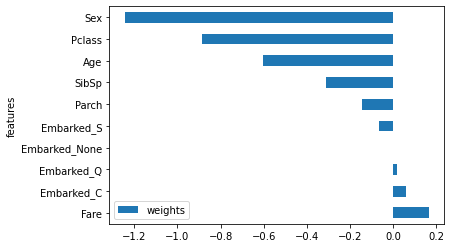

In [21]:

sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0, )

Посчитаем с помощью аттрибутов `coef_` и `intercept_` (с помощью всё той же обученной ранее логистической регрессии)  предсказание вероятности принадлежности объекта к положительному классу для тестовой части.

Для этого применим логистическую функцию к  $ w_0 + <w, x>$

Реализуем логистическую функцию и построим её график.

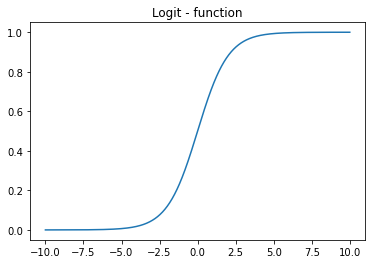

In [22]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 1000)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

plt.title('Logit - function')
plt.plot(x, logistic_function(x))
plt.show()

предсказание вероятности принадлежности объекта к положительному классу для тестовой части вычислим с помощью матричного произведения в numpy

In [23]:
pred_prob = np.ravel(logistic_function(np.dot(X_test, clf.coef_.T) + clf.intercept_))

Вычислить предсказание вероятности принадлежности объекта к положительному классу можно и с помощью метода predict_proba

In [24]:
pred_predict_proba = clf.predict_proba(X_test)[:, 1]

Убедимся, что предсказанные значения совпадают

In [25]:
np.all([pred_prob, pred_predict_proba])

True

Чтобы получить в качестве предсказания метки классов, можно предсказанные вероятности принадлежности объекта к положительному классу бинаризовать по порогу (например по порогу 0.5)

Бинаризуем по порогу 0.5 и посчитаем долю правильных ответов (accuracy) на тестовой выборке.

In [26]:
np.mean((pred_prob > 0.5) == Y_test)

0.7985074626865671

Для предсказания меток классов в sklearn есть метод predict.

In [27]:
pred = clf.predict(X_test)
np.mean(pred == Y_test)

0.7985074626865671

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$.

Применение — подсчёт вероятностей принадлежности положительному классу как применение логистической функции к скалярному произведению признаков и параметров.

Посмотрим на распределение целевого значения

(array([162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 106.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

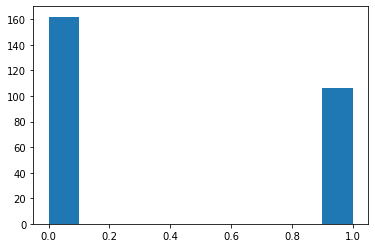

In [28]:
plt.hist(Y_test)

Посмотрим на распределение предсказываемого значения

(array([65., 50., 22., 14., 11., 20., 27., 17., 15., 27.]),
 array([0.00873549, 0.10552052, 0.20230555, 0.29909058, 0.39587561,
        0.49266064, 0.58944567, 0.6862307 , 0.78301573, 0.87980076,
        0.97658579]),
 <a list of 10 Patch objects>)

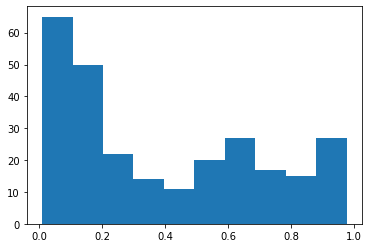

In [29]:
plt.hist(clf.predict_proba(X_test)[:, 1])

Логистическая регрессия возращает вероятности. Проверим это. Для этого рассмотрим объекты, для которых логистическая регрессия предсказала вероятность принадлежности классу 1 от 0.75 до 0.85. Оценим точность предсказания на этих объектах. При большом числе объектов в выборке точность предсказания должна быть близка к 0.8.

In [30]:
predict_proba = clf.predict_proba(X_test)[:, 1]

In [31]:
np.mean(Y_test[(predict_proba > 0.75) & (predict_proba < 0.85)])

0.8947368421052632